In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #dividir datasets 
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error,r2_score,mean_squared_error
from sklearn import svm, preprocessing
from sklearn.preprocessing import StandardScaler


Importancion del set de datos, con su respectivo nombre de columna

In [70]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(url,delim_whitespace=True,names=column_names,header=None)
df.shape


(398, 9)

In [71]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [72]:
#vemos los datos faltantes en el atributo horsepower en total hay 6 
horsepower_missing_ind = df[df.horsepower=='?'].index
df.loc[horsepower_missing_ind]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [73]:
#Arreglamos los datos faltantes en horsepower por medio colocar el valor medio de la columna horsepower en los faltantes

df.loc[horsepower_missing_ind, 'horsepower'] = float('nan')
df.horsepower = df.horsepower.apply(pd.to_numeric)
df.loc[horsepower_missing_ind, 'horsepower'] = int( df.horsepower.mean() )



Ahora vamos a dividir nuestro conjunto de datos, para que los atributos necesarios puedan predecir las millas por galon: 

In [74]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','year']
X = pd.DataFrame(df[factors].copy())
y = df['mpg'].copy()
X = StandardScaler().fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.20,random_state=324)




In [83]:
clf = svm.SVR(kernel='rbf')


clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

print("\n\nMetricas modelo usando máquinas de vector soporte")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('explained_variance_score: %.2f' %explained_variance_score(y_test, y_pred))




Metricas modelo usando máquinas de vector soporte
Mean squared error: 7.01
r_2 statistic: 0.89
Mean absolute error: 1.98
explained_variance_score: 0.89


In [76]:
t = np.arange(80)


Con los datos asi vamos a separar el onjunto de entrenamiento y el conjunto de test:

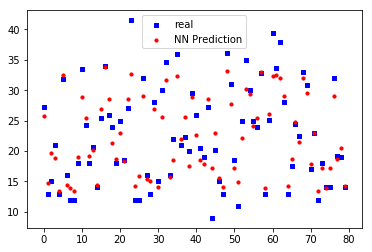

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(t, y_test, s=10, c='b', marker="s", label='real')
ax1.scatter(t,y_pred, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler

X2_train = X_train
X2_test = X_test
scaler = StandardScaler()
scaler.fit(X2_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X_test)

reg = MLPRegressor(hidden_layer_sizes=(17,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

modelo = reg.fit(X2_train, y_train)
test2_y = reg.predict(X2_test)


In [82]:
print("\n\nMetricas modelo de red neuronal")
print("Mean squared error:  %.2f" % mean_squared_error(y_test, test2_y))
print('r_2 statistic: %.2f' % r2_score(y_test, test2_y))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, test2_y))
print('explained_variance_score: %.2f' %explained_variance_score(y_test, test2_y))



Metricas modelo de red neuronal
Mean squared error:  6.02
r_2 statistic: 0.91
Mean absolute error: 1.80
explained_variance_score: 0.91


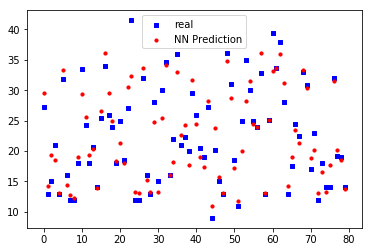

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(t, y_test, s=10, c='b', marker="s", label='real')
ax1.scatter(t,test2_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()
